,mi,a_linha,fi,beta,corda(m)
0,0.00,2.469136,32.642381,25.392381,0.062761
1,0.05,2.469136,32.642381,25.392381,0.062761
2,0.10,0.617284,34.489957,27.239957,0.065888
3,0.15,0.274348,30.168160,22.918160,0.058473
4,0.20,0.154321,25.700741,18.450741,0.050460
5,0.25,0.098765,22.023055,14.773055,0.043631
6,0.30,0.068587,19.116224,11.866224,0.038105
7,0.35,0.050391,16.816431,9.566431,0.033662
8,0.40,0.038580,14.973800,7.723800,0.030064
9,0.45,0.030483,13.474577,6.224577,0.027112


,x_ataque,y_ataque,z_ataque(m),x_fuga,y_fuga,z_fuga(m)
0,0.017009,-0.008074,0.0000,-0.039689,0.018839,0.0000
1,0.017009,-0.008074,0.0000,-0.039689,0.018839,0.0000
2,0.017009,-0.008074,0.0125,-0.039689,0.018839,0.0125
3,0.017574,-0.009047,0.0250,-0.041006,0.021111,0.0250
4,0.016157,-0.006831,0.0375,-0.037700,0.015939,0.0375
5,0.014360,-0.004791,0.0500,-0.033506,0.011179,0.0500
6,0.012657,-0.003338,0.0625,-0.029532,0.007788,0.0625
7,0.011187,-0.002351,0.0750,-0.026103,0.005485,0.0750
8,0.009958,-0.001678,0.0875,-0.023236,0.003916,0.0875
9,0.008937,-0.001212,0.1000,-0.020854,0.002828,0.1000


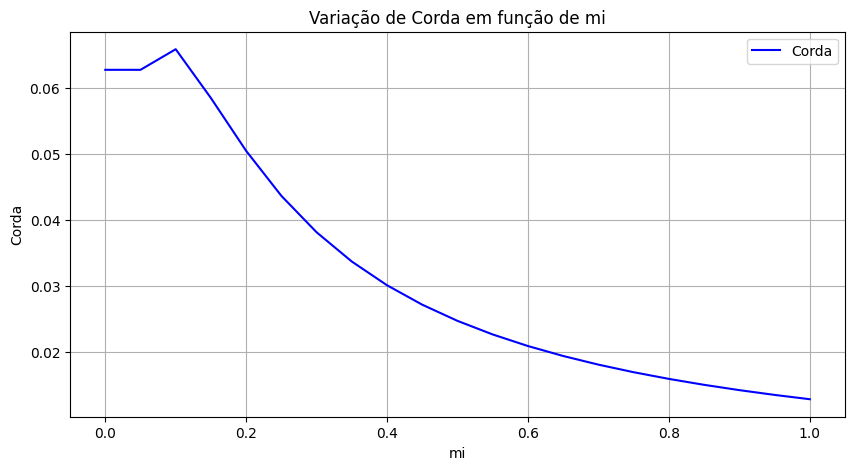

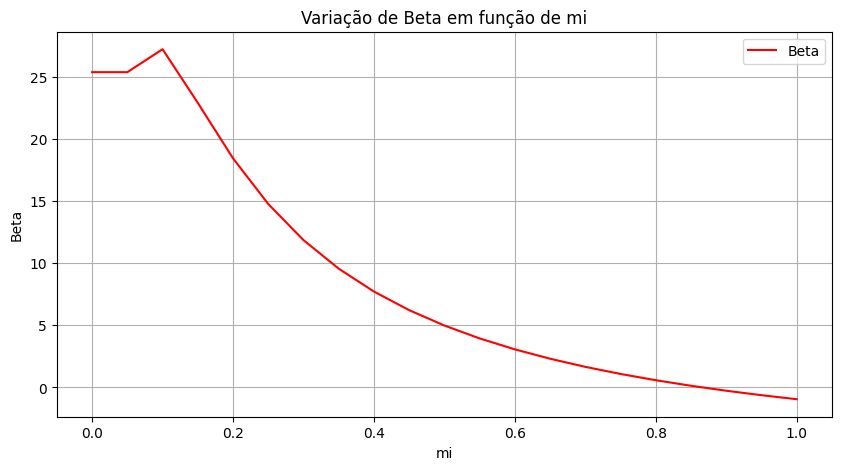

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Re = 500000
# Definições de variáveis
raio = int(input('qual o raio?(cm) '))  # Raio fixo
tsr = int(input('Qual o tsr?'))  # Número de TSR (Tip Speed Ratio) dependente do projeto
n = 2  # Número de pás
cl_opt = float(input('qual o Cl opt?'))  # Coeficiente de sustentação ótimo para alpha ótimo
fator_axial = 1/3  # Fator axial ideal segundo Betz
p_rot = float(input('qual a cambagem?'))  # Cambagem
alpha_ot = float(input('qual o alpha ótimo?'))  # Ângulo de ataque ótimo (ve no perfil/site)

# Criação do array de 'mi'
mi = np.arange(0.05, 1.0 + 0.05, 0.05)  # Define intervalo com um passo de 0.05

# Exemplo de dados para o DataFrame
data = {
    'mi': mi,
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Calcular a_linha
df['a_linha'] = (fator_axial * (1 - fator_axial)) / ((tsr * df['mi'])**2)  # Usar ** para exponenciação em Python

# Calcular fi usando funções vetorizadas do NumPy
df['fi'] = np.degrees(np.arctan((1 - fator_axial) / (tsr * df['mi'] * (1 + df['a_linha']))))

# Calcular beta
df['beta'] = df['fi'] - alpha_ot

# Calcular corda
df['corda(m)'] = (8 * np.pi * raio * ((tsr * df['mi'])**2) * df['a_linha']) / (
    tsr * n * cl_opt * np.sqrt((1 - fator_axial)**2 + (tsr * df['mi'] * (1 + df['a_linha']))**2)
)
# Coletar a primeira linha de pontos
primeira_linha = df.iloc[0].copy()

# Definir z_ataque e z_fuga como zero na linha coletada
primeira_linha['mi'] = 0

# Inserir a nova linha como a primeira do DataFrame
df = pd.concat([pd.DataFrame([primeira_linha]), df], ignore_index=True)
df['corda(m)'] = df['corda(m)']/100


###################################################
# Criando coordenadas de fuga e ataque
pontos = pd.DataFrame()

# Adicionar as colunas diretamente
pontos['x_ataque'] = np.cos(np.radians(360 - df['beta'])) * p_rot * df['corda(m)']
pontos['y_ataque'] = np.sin(np.radians(360 - df['beta'])) * p_rot * df['corda(m)']
pontos['z_ataque(m)'] = df['mi'] * raio
pontos['x_fuga'] = np.cos(np.radians(180 - df['beta'])) * df['corda(m)'] * (1 - p_rot)
pontos['y_fuga'] = np.sin(np.radians(180 - df['beta'])) * df['corda(m)'] * (1 - p_rot)
pontos['z_fuga(m)'] = df['mi'] * raio

# Coletar a primeira linha de pontos
primeira_linha = pontos.iloc[0].copy()

# Definir z_ataque e z_fuga como zero na linha coletada
primeira_linha['z_ataque(m)'] = 0
primeira_linha['z_fuga(m)'] = 0

# Inserir a nova linha como a primeira do DataFrame
pontos = pd.concat([pd.DataFrame([primeira_linha]), pontos], ignore_index=True)
pontos['z_ataque(m)'] = pontos['z_ataque(m)']/100
pontos['z_fuga(m)'] = pontos['z_fuga(m)']/100

# Imprimir DataFrames
display(df)

display(pontos)

# Gráfico interativo 3D com Plotly
fig = go.Figure()

# Adicionar pontos de ataque
fig.add_trace(go.Scatter3d(
    x=pontos['x_ataque'], y=pontos['y_ataque'], z=pontos['z_ataque(m)'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Ataque'
))

# Adicionar pontos de fuga
fig.add_trace(go.Scatter3d(
    x=pontos['x_fuga'], y=pontos['y_fuga'], z=pontos['z_fuga(m)'],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Fuga'
))

# Configurações do gráfico
fig.update_layout(
    title='Gráfico 3D das Coordenadas de Ataque e Fuga',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=800,  # Ajuste a largura do gráfico
    height=800  # Ajuste a altura do gráfico
)

# Mostrar gráfico interativo
fig.show()


# Gráfico para df['corda']
plt.figure(figsize=(10, 5))
plt.plot(df['mi'], df['corda(m)'], label='Corda', color='b')
plt.xlabel('mi')
plt.ylabel('Corda')
plt.title('Variação de Corda em função de mi')
plt.grid(True)
plt.legend()
plt.savefig('grafico_corda.png')
plt.show()

# Gráfico para df['beta']
plt.figure(figsize=(10, 5))
plt.plot(df['mi'], df['beta'], label='Beta', color='r')
plt.xlabel('mi')
plt.ylabel('Beta')
plt.title('Variação de Beta em função de mi')
plt.grid(True)
plt.legend()
plt.savefig('grafico_beta.png')
plt.show()


